In [1]:



from sklearn import linear_model
# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for missing values
import missingno as mno

# for date time manipulation
import datetime

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# setting up the background style for the plots
plt.style.use('fivethirtyeight')

C:\Users\7475\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\7475\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders 
from category_encoders.target_encoder import TargetEncoder
from sklearn import preprocessing
from datetime import datetime
import seaborn as sb
from scipy import stats
from scipy.stats import kurtosis
import matplotlib.pyplot as plt

#model metrics 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

C:\Users\7475\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\7475\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\74

In [3]:
import pandas as pd
# reading the data and also checking the computation time
%time data = pd.read_csv('business_data1.csv')

Wall time: 12.1 ms


In [4]:
df=pd.read_csv('business_data1.csv')
df.head()

,Financial Year,Stocks,Net Investments (Short Term),Net Investments (Long Term),Profit,Property,Loan,Expenditure,Tax Paid FY,Daily Living Expenses
0,2022,2660,5567,28416,3226,74265,26220,9595,1574,1299
1,2021,1734,8845,21172,2099,63122,40227,8439,3381,1454
2,2020,3675,8462,28947,4502,63115,41978,6713,2020,971
3,2019,1912,14336,24762,3789,85398,44701,7128,3993,786
4,2018,2590,7136,25630,3122,93975,48332,7329,1489,1893


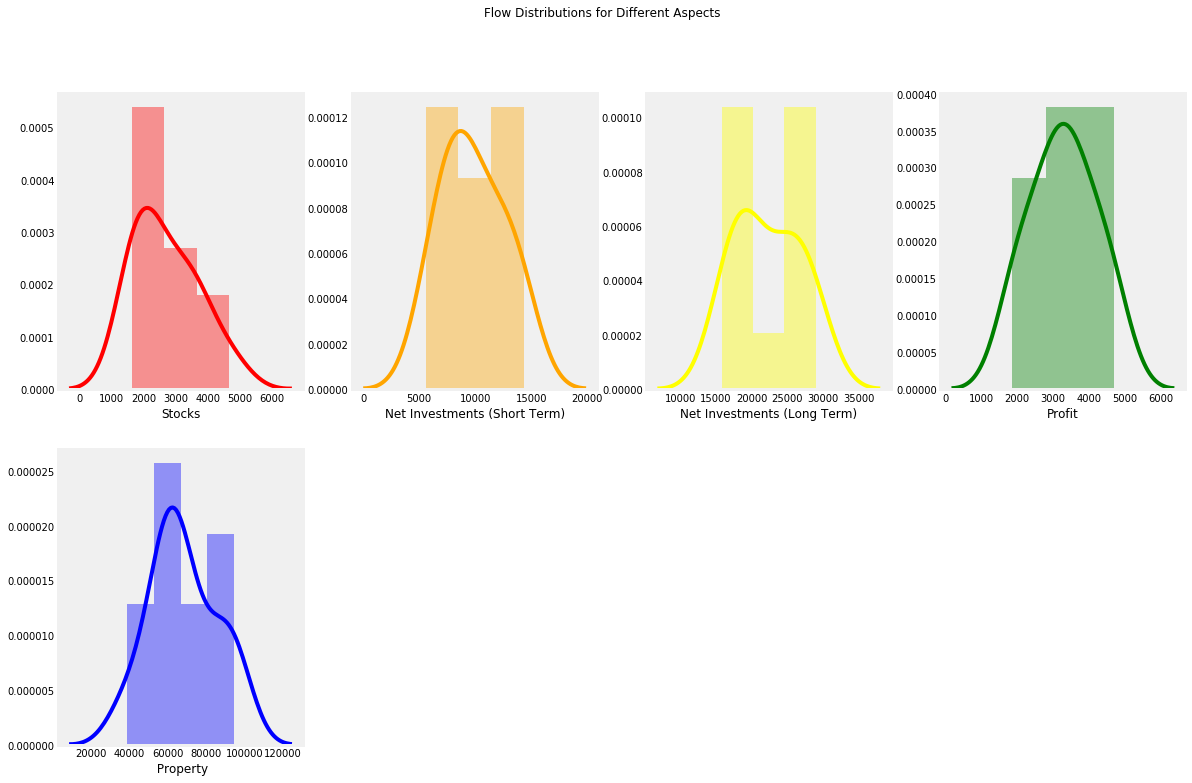

In [5]:
# lets check the Distribution of Assests factor

plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(data['Stocks'], color = 'red')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['Net Investments (Short Term)'], color = 'orange')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['Net Investments (Long Term)'], color = 'yellow')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['Profit'], color = 'green')
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data[' Property'], color = 'blue')
plt.grid()


plt.suptitle('Flow Distributions for Different Aspects')
plt.show()

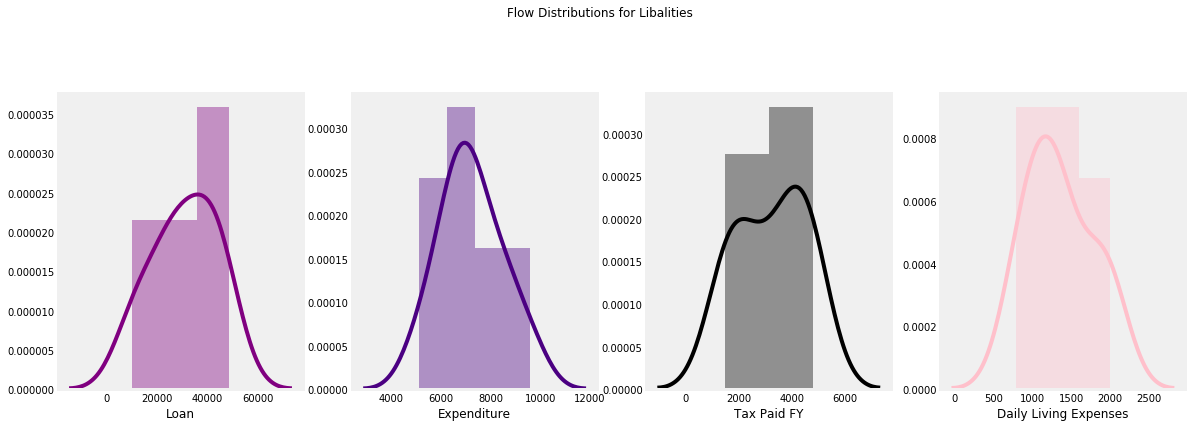

In [6]:
# lets check the Distribution of libality factor
plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(data['Loan'], color = 'purple')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['Expenditure'], color = 'indigo')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['Tax Paid FY'], color = 'black')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['Daily Living Expenses'], color = 'pink')
plt.grid()

plt.suptitle('Flow Distributions for Libalities ')
plt.show()

In [7]:
df['Assets']=df['Stocks']+df['Net Investments (Short Term)']+df['Net Investments (Long Term)']+df['Profit']+df[' Property']


df['Libalities']=df['Loan']+df['Expenditure']+df['Tax Paid FY']+df['Daily Living Expenses']

df

,Financial Year,Stocks,Net Investments (Short Term),Net Investments (Long Term),Profit,Property,Loan,Expenditure,Tax Paid FY,Daily Living Expenses,Assets,Libalities
0,2022,2660,5567,28416,3226,74265,26220,9595,1574,1299,114134,38688
1,2021,1734,8845,21172,2099,63122,40227,8439,3381,1454,96972,53501
2,2020,3675,8462,28947,4502,63115,41978,6713,2020,971,108701,51682
3,2019,1912,14336,24762,3789,85398,44701,7128,3993,786,130197,56608
4,2018,2590,7136,25630,3122,93975,48332,7329,1489,1893,132453,59043
5,2017,2061,11484,25529,4703,51989,28752,6028,4697,1999,95766,41476
6,2016,3366,12192,19340,2512,94844,12692,6212,4500,901,132254,24305
7,2015,3539,10158,17275,3957,66713,21352,8526,4778,1908,101642,36564
8,2014,1630,13622,18189,3441,58822,10401,7572,1927,1100,95704,21000
9,2013,4663,8979,15826,1849,59581,37287,5120,4171,1261,90898,47839


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Assets over Libalities(per 100,000)')

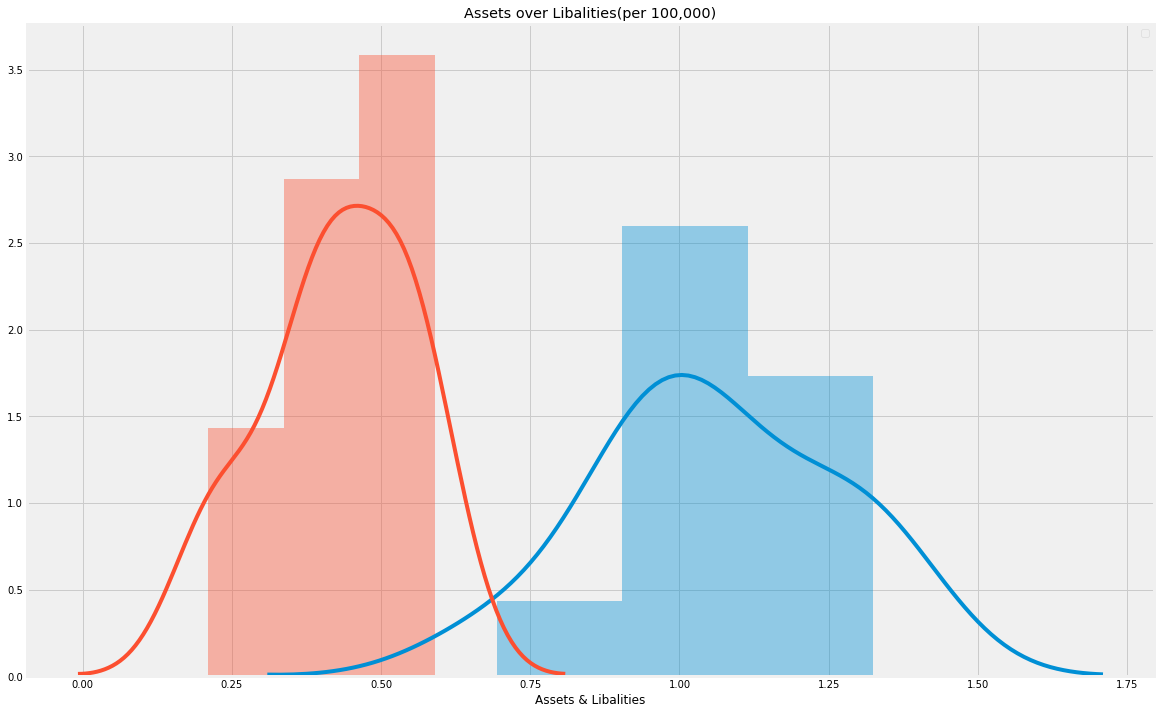

In [8]:

sns.distplot(df['Assets']/100000)
sns.distplot(df['Libalities']/100000)
plt.plot()
plt.legend()
plt.xlabel("Assets & Libalities")
plt.title("Assets over Libalities(per 100,000)")

In [9]:
df['flow(per 100000)']=(df['Assets']-(2*df['Libalities']))/100000
df

df['Status']=df['flow(per 100000)']

In [21]:
yrs=df['Financial Year'].to_numpy
a=df['Assets'].to_numpy
b=df['Libalities'].to_numpy



independent=['Assets','Loan','Libalities']
x=df[independent].to_numpy
y=df['Profit'].to_numpy


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
#test dataset will have clear_date NULL as it is what we want to predict
test= df[df['Financial Year'].isnull()].reset_index(drop=True)

#x of test without target
x_test= test.drop('Financial Year',axis=1)

#y of test with target
y_test= test[['Financial Year']]


NameError: name 'train' is not defined

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=0)
reg=LinearRegression()
reg.fit(X_train,y_train)


TypeError: Singleton array array(<bound method DataFrame.to_numpy of     Assets   Loan  Libalities
0   114134  26220       38688
1    96972  40227       53501
2   108701  41978       51682
3   130197  44701       56608
4   132453  48332       59043
5    95766  28752       41476
6   132254  12692       24305
7   101642  21352       36564
8    95704  10401       21000
9    90898  37287       47839
10   69453  29293       40338>, dtype=object) cannot be considered a valid collection.

In [ ]:
y_pred = reg.predict(X_test)